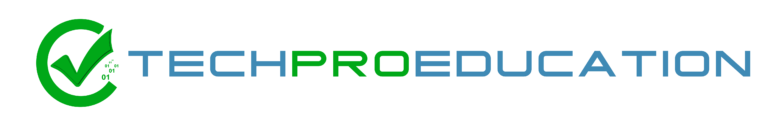

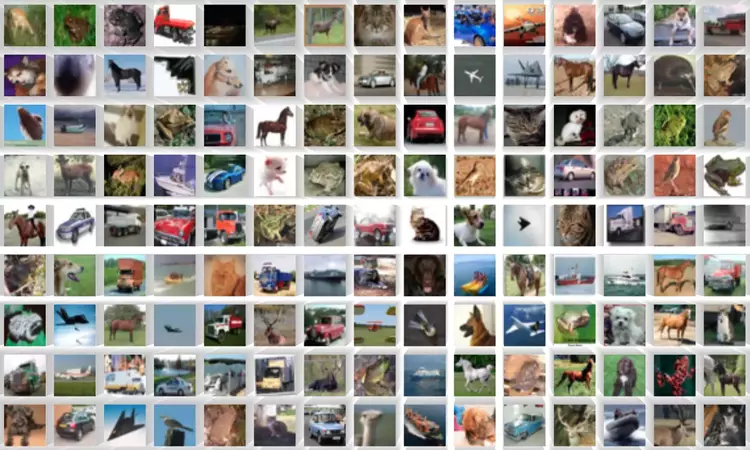

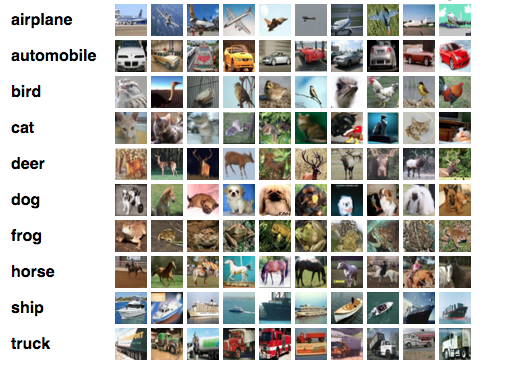

In [1]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


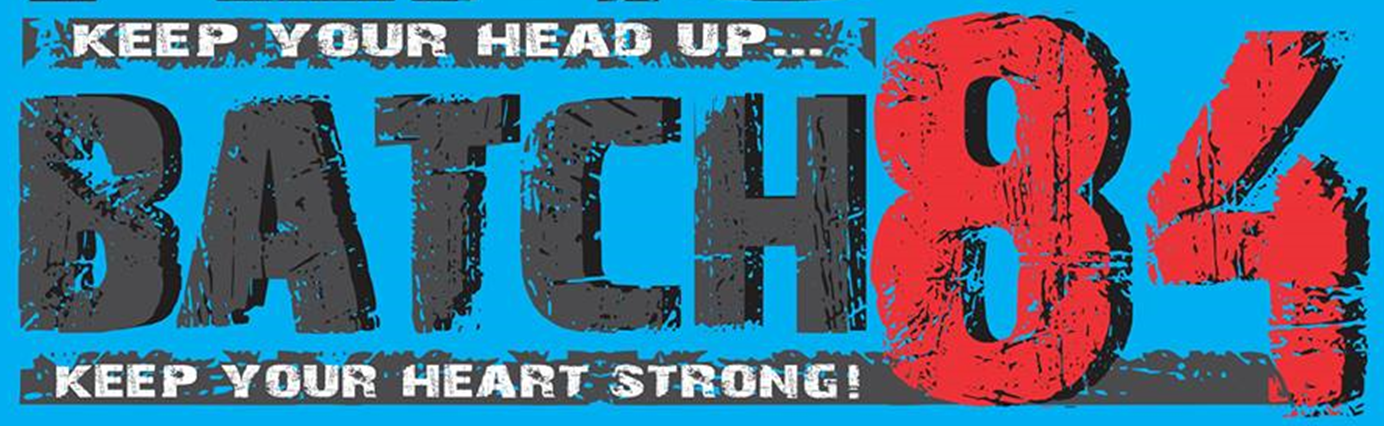

In [2]:
import pandas as pd
import seaborn as sns
import tensorflow as tf                       
import numpy as np                           
import matplotlib.pyplot as plt    
%matplotlib inline

In [3]:
from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print("There are ", len(X_train), "images in the training dataset")     
print("There are ", len(X_test), "images in the test dataset")   

There are  50000 images in the training dataset
There are  10000 images in the test dataset


The CIFAR-10 dataset
The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 5000 images from each class.

In [5]:
# Checking the shape of one image
X_train[5].shape

(32, 32, 3)

In [6]:
X_train[5]

array([[[159, 102, 101],
        [150,  91,  95],
        [153,  95,  97],
        ...,
        [ 91,  71,  56],
        [ 74,  63,  55],
        [ 76,  58,  55]],

       [[142,  75,  68],
        [146,  72,  66],
        [155,  76,  65],
        ...,
        [127, 105,  71],
        [122, 111,  93],
        [ 86,  69,  61]],

       [[109,  67,  75],
        [ 99,  58,  60],
        [105,  59,  52],
        ...,
        [137, 112,  80],
        [163, 132, 105],
        [ 93,  72,  71]],

       ...,

       [[244, 129,  70],
        [240, 123,  65],
        [241, 122,  65],
        ...,
        [156,  42,  15],
        [179,  59,  26],
        [200,  73,  36]],

       [[246, 133,  74],
        [243, 128,  72],
        [243, 127,  70],
        ...,
        [162,  44,  14],
        [178,  56,  22],
        [192,  65,  27]],

       [[246, 139,  82],
        [243, 133,  78],
        [244, 132,  77],
        ...,
        [166,  47,  14],
        [173,  51,  17],
        [182,  57,  19]]

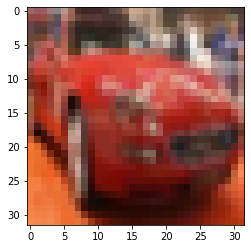

In [7]:
plt.imshow(X_train[5])
# plt.matshow(X_train[5])

In [8]:
y_train[5]

array([1], dtype=uint8)

In [9]:
y_train.shape

(50000, 1)

In [10]:
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000],
       dtype=int64))

**Class names:**

- 0: Airplane
- 1: Automobile
- 2: Bird
- 3: Cat
- 4: Deer
- 5: Dog
- 6: Frog
- 7: Horse
- 8: Ship
- 9: Truck

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
int(np.random.randint(low=0, high=50000, size=1))

9629

In [13]:
X_train[int(np.random.randint(low=0, high=50000, size=1))]

array([[[175, 121,  73],
        [158, 110,  67],
        [164, 121,  81],
        ...,
        [205, 151,  86],
        [203, 149,  86],
        [202, 146,  82]],

       [[167, 117,  77],
        [165, 115,  74],
        [160, 107,  66],
        ...,
        [207, 152,  88],
        [204, 150,  88],
        [203, 145,  81]],

       [[160, 111,  74],
        [162, 109,  69],
        [169, 109,  66],
        ...,
        [206, 150,  88],
        [204, 147,  86],
        [203, 143,  81]],

       ...,

       [[200, 153, 106],
        [197, 148,  99],
        [194, 151, 105],
        ...,
        [143, 102,  68],
        [185, 137,  90],
        [186, 137,  83]],

       [[181, 139, 102],
        [177, 133,  91],
        [175, 136,  96],
        ...,
        [185, 134,  85],
        [188, 132,  78],
        [185, 135,  79]],

       [[147, 112,  77],
        [155, 117,  79],
        [161, 128,  94],
        ...,
        [178, 132,  79],
        [181, 132,  81],
        [181, 134,  80]]

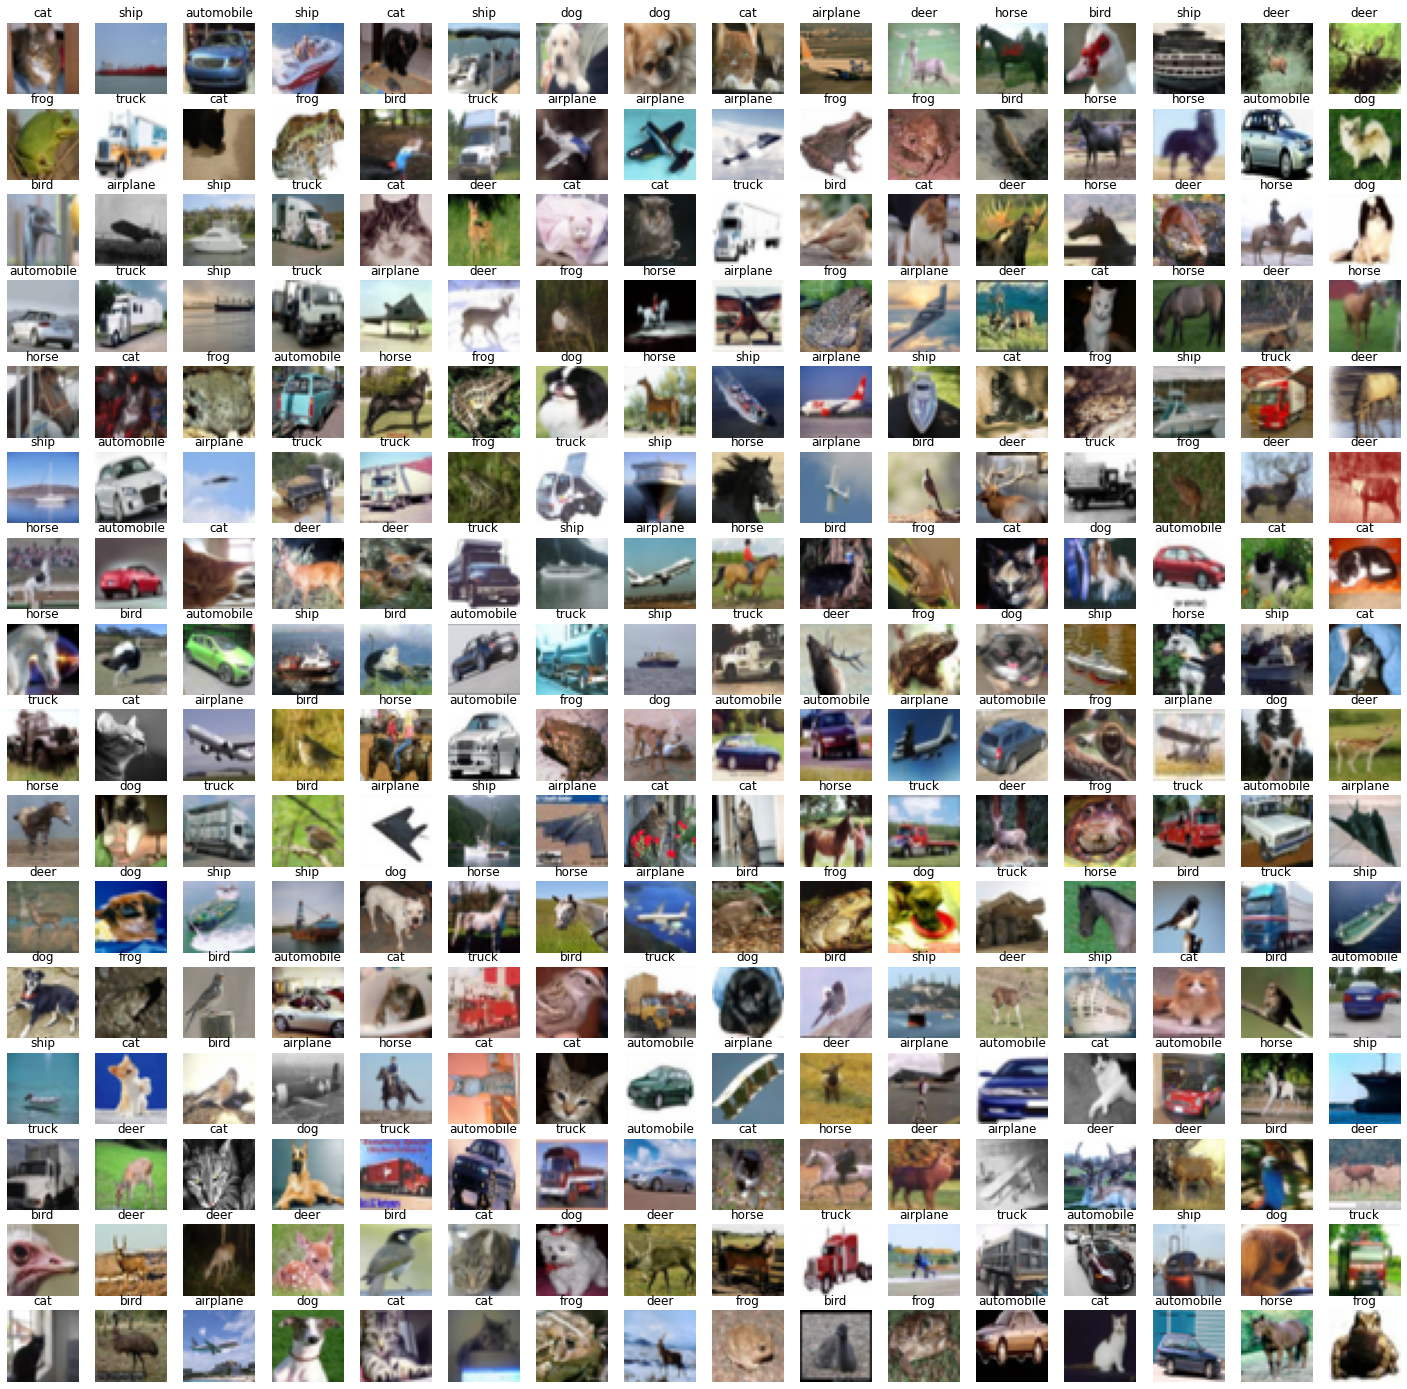

In [14]:
plt.figure(figsize=(25, 25))
for i in range(256):
    rand_index = int(np.random.randint(low=0, high=50000, size=1))
    plt.subplot(16, 16, i+1, label=classes[int(y_train[rand_index])])
    plt.axis('off')
    plt.title(classes[int(y_train[rand_index])])
    plt.imshow(X_train[rand_index])    

## Data Preprocessing

In [20]:
X_train[5].min()

0

In [21]:
X_train[5].max()

252

In [22]:
# Normalize image pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [23]:
X_train[5].min()

0.0

In [24]:
X_train[5].max()

0.9882353

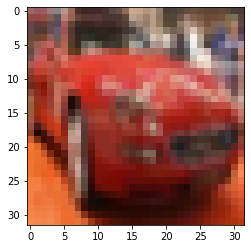

In [25]:
plt.imshow(X_train[5])

In [26]:
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [27]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

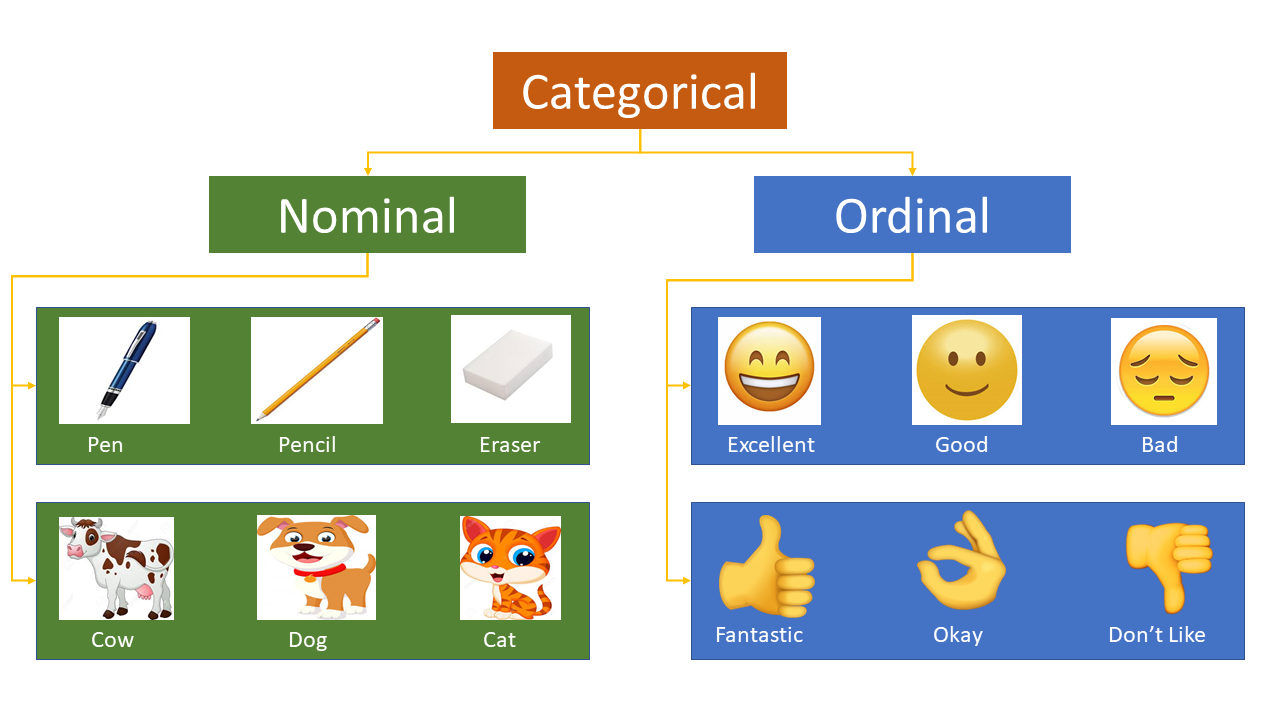

In [29]:
from tensorflow.keras.utils import to_categorical

In [30]:
Y_train = to_categorical(y_train, 10) 
Y_test = to_categorical(y_test, 10)
Y_test.shape

(10000, 10)

In [31]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout

In [32]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=(32, 32, 3), activation='relu', padding='same'))

model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 2048)              0

In [34]:
from tensorflow.keras.callbacks import EarlyStopping

In [35]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

In [36]:
model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data=(X_test,Y_test),callbacks=[early_stop])

Epoch 1/50
1563/1563 [==============================] - 192s 121ms/step - loss: 1.3944 - accuracy: 0.4950 - val_loss: 1.1521 - val_accuracy: 0.5981
Epoch 2/50
1563/1563 [==============================] - 175s 112ms/step - loss: 0.9474 - accuracy: 0.6651 - val_loss: 0.9296 - val_accuracy: 0.6748
Epoch 3/50
1563/1563 [==============================] - 176s 112ms/step - loss: 0.7917 - accuracy: 0.7236 - val_loss: 0.8664 - val_accuracy: 0.6985
Epoch 4/50
1563/1563 [==============================] - 174s 111ms/step - loss: 0.6968 - accuracy: 0.7555 - val_loss: 0.8186 - val_accuracy: 0.7197
Epoch 5/50
1563/1563 [==============================] - 175s 112ms/step - loss: 0.6124 - accuracy: 0.7844 - val_loss: 0.8116 - val_accuracy: 0.7274
Epoch 6/50
1563/1563 [==============================] - 175s 112ms/step - loss: 0.5462 - accuracy: 0.8062 - val_loss: 0.8042 - val_accuracy: 0.7322
Epoch 7/50
1563/1563 [==============================] - 174s 111ms/step - loss: 0.4868 - accuracy: 0.8261 - val_

In [37]:
model.metrics_names

['loss', 'accuracy']

In [38]:
model.history.history

{'loss': [1.394378423690796,
  0.9473714828491211,
  0.7917286157608032,
  0.6968371272087097,
  0.6124052405357361,
  0.5462465882301331,
  0.48675331473350525,
  0.4289925694465637,
  0.37683093547821045,
  0.33010783791542053,
  0.2929317057132721],
 'accuracy': [0.49498000741004944,
  0.6650599837303162,
  0.7235599756240845,
  0.7555400133132935,
  0.7844399809837341,
  0.8062000274658203,
  0.8260999917984009,
  0.846340000629425,
  0.8677200078964233,
  0.8837199807167053,
  0.8967800140380859],
 'val_loss': [1.1520984172821045,
  0.9295565485954285,
  0.8664239048957825,
  0.8186160326004028,
  0.8116235136985779,
  0.8042355179786682,
  0.8239995837211609,
  0.9280093908309937,
  0.9856675863265991,
  1.03459632396698,
  1.0685582160949707],
 'val_accuracy': [0.5981000065803528,
  0.6747999787330627,
  0.6984999775886536,
  0.7196999788284302,
  0.727400004863739,
  0.732200026512146,
  0.7297000288963318,
  0.7182999849319458,
  0.7192000150680542,
  0.7236999869346619,
  0.7

In [39]:
summary = pd.DataFrame(model.history.history)
summary.head()

loss  accuracy  val_loss  val_accuracy
0  1.394378   0.49498  1.152098        0.5981
1  0.947371   0.66506  0.929557        0.6748
2  0.791729   0.72356  0.866424        0.6985
3  0.696837   0.75554  0.818616        0.7197
4  0.612405   0.78444  0.811624        0.7274

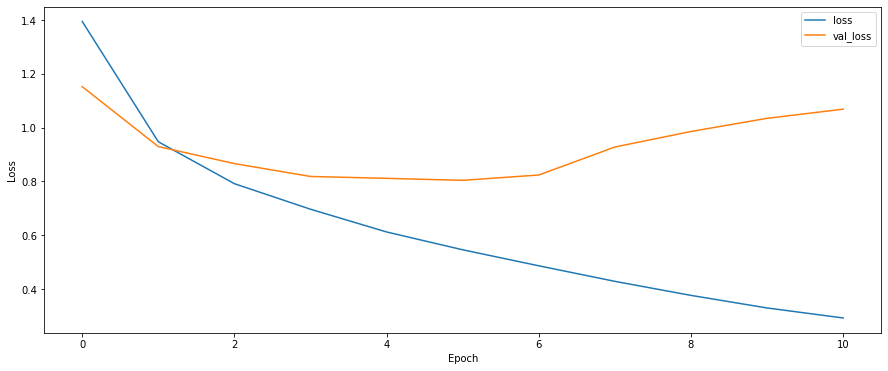

In [40]:
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

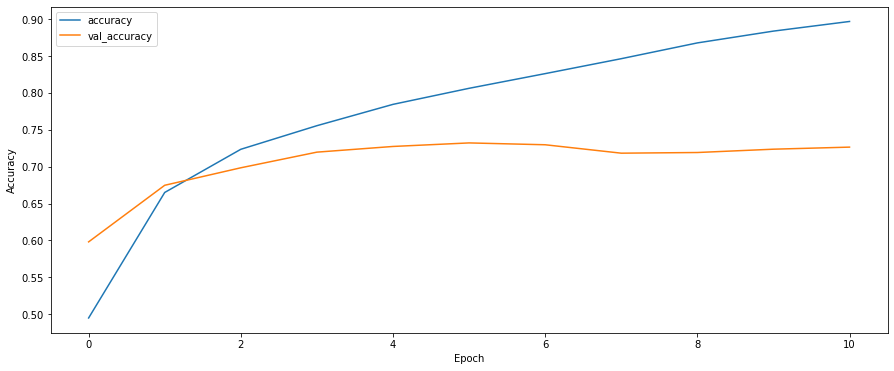

In [41]:
plt.figure(figsize=(15, 6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [42]:
print(model.evaluate(X_test, Y_test, verbose=1))

313/313 [==============================] - 9s 28ms/step - loss: 1.0686 - accuracy: 0.7265
[1.0685582160949707, 0.7264999747276306]


In [43]:
from sklearn.metrics import classification_report,confusion_matrix, plot_confusion_matrix

In [44]:
preds = model.predict(X_test)


In [45]:
predictions = np.argmax(preds, axis=1)

In [46]:
predictions

array([3, 8, 8, ..., 5, 0, 7], dtype=int64)

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1000
           1       0.91      0.80      0.85      1000
           2       0.59      0.62      0.61      1000
           3       0.55      0.57      0.56      1000
           4       0.67      0.68      0.67      1000
           5       0.58      0.66      0.62      1000
           6       0.80      0.76      0.78      1000
           7       0.84      0.72      0.78      1000
           8       0.80      0.89      0.84      1000
           9       0.82      0.82      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



In [48]:
print(confusion_matrix(y_test, predictions))

[[751   5  53  21  21  14  11   9  77  38]
 [ 22 799  13   7   3   9  12   0  47  88]
 [ 69   1 622  51  88  73  51  20  15  10]
 [ 14   5  76 567  72 175  46  18  17  10]
 [ 17   2  88  61 682  55  43  41   9   2]
 [  7   3  52 179  38 657  17  33  10   4]
 [  5   1  68  70  48  31 764   4   7   2]
 [ 13   4  48  49  59  93   4 721   3   6]
 [ 41   8  15  13   6   9   4   1 886  17]
 [ 27  49  12  20   8  18   6  13  31 816]]


In [49]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0685582160949707
Test accuracy: 0.7264999747276306


In [50]:
my_image = X_test[44]

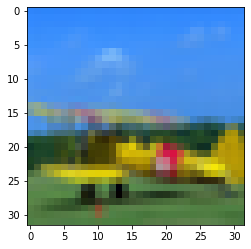

In [50]:
plt.imshow(my_image)

In [51]:
image_prediction = model.predict(my_image.reshape(1,32,32,3))

In [52]:
image_prediction

array([[0.99974114, 0.00001128, 0.000002  , 0.00000003, 0.00000015,
        0.00000001, 0.        , 0.        , 0.00001805, 0.00022739]],
      dtype=float32)

In [53]:
np.argmax(image_prediction, axis=1)

array([0])

In [54]:
result=np.argmax(image_prediction, axis=1)

In [55]:
result

array([0])

In [56]:
classes[int(result)]

'airplane'

In [57]:
#model.save("cnn-1.h5")

In [58]:
early_stop = EarlyStopping(monitor='val_loss', patience=15)

In [59]:
model= Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=(32,32,3), padding='same'))
        
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
    
model.add(Conv2D(filters=128,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D((2,2)))
model.add(Dropout(0.4))
        
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 conv2d_4 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 16, 16, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                  

In [61]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

2022-03-11 23:57:36.295225: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.
2022-03-11 23:57:36.640798: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 [==============================] - 12s 7ms/step - loss: 1.3754 - accuracy: 0.5027 - val_loss: 1.0597 - val_accuracy: 0.6302
Epoch 2/100
1563/1563 [==============================] - 12s 8ms/step - loss: 0.9934 - accuracy: 0.6475 - val_loss: 0.8900 - val_accuracy: 0.6925
Epoch 3/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8444 - accuracy: 0.7028 - val_loss: 0.7929 - val_accuracy: 0.7287
Epoch 4/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7504 - accuracy: 0.7338 - val_loss: 0.7519 - val_accuracy: 0.7389
Epoch 5/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6811 - accuracy: 0.7568 - val_loss: 0.7306 - val_accuracy: 0.7479
Epoch 6/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6134 - accuracy: 0.7817 - val_loss: 0.6996 - val_accuracy: 0.7600
Epoch 7/100
1563/1563 [==============================] - 11s 7ms/step - loss: 0.5694 - accuracy: 0.7975 - val_loss: 0.7285 -

In [62]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.8310430645942688
Test accuracy: 0.7698000073432922


In [63]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [64]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.84      0.78      0.81      1000
           1       0.87      0.90      0.89      1000
           2       0.65      0.69      0.67      1000
           3       0.58      0.56      0.57      1000
           4       0.73      0.74      0.73      1000
           5       0.68      0.65      0.66      1000
           6       0.79      0.83      0.81      1000
           7       0.79      0.83      0.81      1000
           8       0.89      0.87      0.88      1000
           9       0.87      0.87      0.87      1000

    accuracy                           0.77     10000
   macro avg       0.77      0.77      0.77     10000
weighted avg       0.77      0.77      0.77     10000



In [65]:
print(confusion_matrix(y_test, predictions))

[[778  14  66  23   9   5  12  19  47  27]
 [  7 898   3   9   2   3  11   2  14  51]
 [ 46   3 687  49  74  49  59  20   9   4]
 [ 15  11  80 557  66 148  50  53   9  11]
 [ 15   1  57  45 738  28  50  56   7   3]
 [  6   4  59 158  47 646  17  52   5   6]
 [  2   4  44  63  24  21 830   6   4   2]
 [ 12   2  36  26  43  38   5 828   5   5]
 [ 34  25  14  15   6   7   8   3 866  22]
 [ 13  65   8  15   3   2   4   8  12 870]]


<AxesSubplot:>

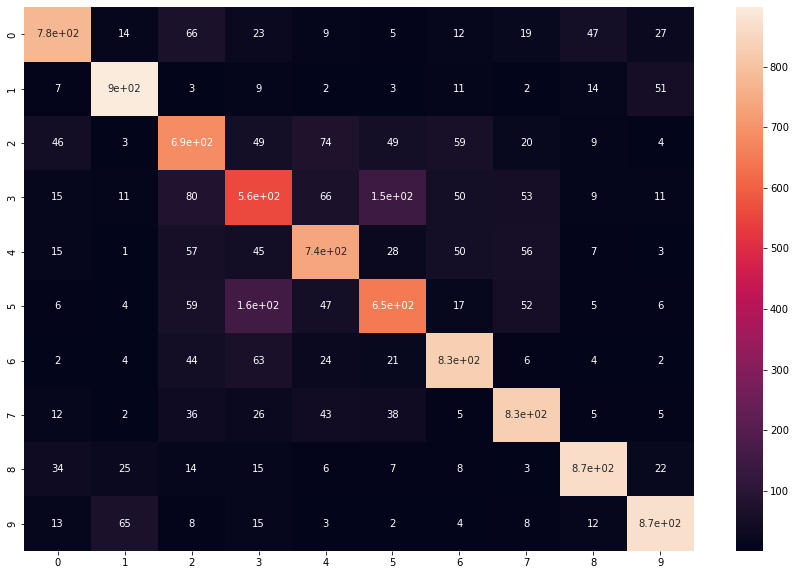

In [66]:
plt.figure(figsize=(15,10))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True)

In [67]:
from tensorflow.keras.layers import BatchNormalization

In [73]:
early_stop = EarlyStopping(monitor='val_loss',patience=10)

In [71]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.3))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))

model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(256, (3,3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2,2)))
#model.add(Dropout(0.5))


model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
#model.add(Dropout(0.5))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))    # num_classes = 10

# Checking the model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 batch_normalization_12 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_17 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 batch_normalization_13 (Bat  (None, 32, 32, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 32)       0         
 2D)                                                             
                                                      

In [72]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [74]:
model.fit(X_train, Y_train, batch_size=32, epochs=100, validation_data=(X_test,Y_test), callbacks=[early_stop])

2022-03-12 00:11:43.402142: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/100
1563/1563 [==============================] - 18s 11ms/step - loss: 1.5087 - accuracy: 0.4816 - val_loss: 1.1558 - val_accuracy: 0.5857
Epoch 2/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.9236 - accuracy: 0.6833 - val_loss: 0.8781 - val_accuracy: 0.6967
Epoch 3/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.7248 - accuracy: 0.7572 - val_loss: 0.6810 - val_accuracy: 0.7720
Epoch 4/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.6035 - accuracy: 0.7987 - val_loss: 0.6465 - val_accuracy: 0.7781
Epoch 5/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.4980 - accuracy: 0.8349 - val_loss: 0.5724 - val_accuracy: 0.8089
Epoch 6/100
1563/1563 [==============================] - 16s 10ms/step - loss: 0.4095 - accuracy: 0.8632 - val_loss: 0.5530 - val_accuracy: 0.8196
Epoch 7/100
1563/1563 [==============================] - 17s 11ms/step - loss: 0.3315 - accuracy: 0.8913 - val_loss: 0

In [51]:
score = model.evaluate(X_test, Y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 1.0685582160949707
Test accuracy: 0.7264999747276306


In [52]:
preds = model.predict(X_test)
predictions= np.argmax(preds, axis=1)

In [53]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1000
           1       0.91      0.80      0.85      1000
           2       0.59      0.62      0.61      1000
           3       0.55      0.57      0.56      1000
           4       0.67      0.68      0.67      1000
           5       0.58      0.66      0.62      1000
           6       0.80      0.76      0.78      1000
           7       0.84      0.72      0.78      1000
           8       0.80      0.89      0.84      1000
           9       0.82      0.82      0.82      1000

    accuracy                           0.73     10000
   macro avg       0.73      0.73      0.73     10000
weighted avg       0.73      0.73      0.73     10000



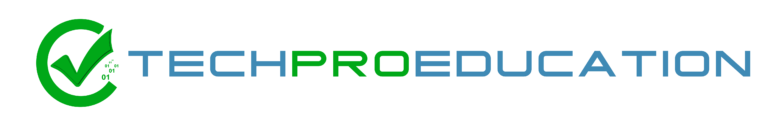

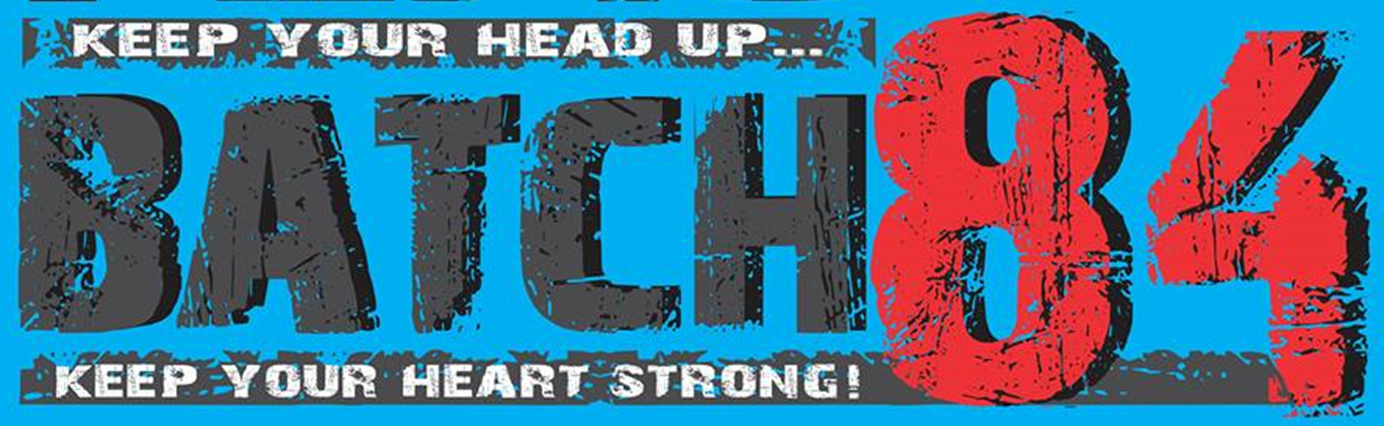